# NFL Concussions And Safety From 2012-2014
## Kyle O'Leary
### 12/10/2024

1. For my final project I am looking at a topic that is hot in the sports world. NFL and protection for players. Concussions have been brutal in the NFL, with some players concussions resulting in getting CTE, Chronic Traumatic Encephalopathy. Some players have died from CTE, Ray Abruzzese, Phillip Adams, George Andrie, and more. The purpose of this analysis is to see how common concussions are through this data set. For my hypothesis, I am going to attempt to see if concussions have been happening more or less often. I personaly think that they have been happening more often because football is just a very physical sport and players now in my opinion seem way stronger than back then, like 80's and 90's. I am going to use data from a user named Alice, from Github (https://github.com/ali-ce/datasets/blob/master/NFL/Concussion%20Injuries%202012-2014.csv) to test my hypothesis. The data set is about concussions in the NFL ranging from 2012-2014. The reason I am using data from 2012-2014 is because it was the most recent and thorough data set I could find about concussions in the NFL.

2. First I am importing the sources I need to complete this data analysis.

In [110]:
# Importing pandas, matplotlib, seaborn, and numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

3. Here I am importing the data file I need, which again is from a user name Alice, from github (https://github.com/ali-ce/datasets/blob/master/NFL/Concussion%20Injuries%202012-2014.csv), and displaying it using .read_csv

In [111]:
# Reading file using .read_csv and displaying it with .head to start
ad = pd.read_csv('file:///Users/kyleoleary/Downloads/Concussion%20Injuries%202012-2014.csv')
ad.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


4. Now that I have the data file ready, I use .keys to see all the keys in this data sets dictionary.

In [112]:
# Using .keys to view all of the keys in the dictionary
ad.keys

<bound method NDFrame.keys of                                                     ID             Player  \
0    Aldrick Robinson - Washington Redskins vs. Tam...   Aldrick Robinson   
1    D.J. Fluker - Tennessee Titans vs. San Diego C...        D.J. Fluker   
2    Marquise Goodwin - Houston Texans vs. Buffalo ...   Marquise Goodwin   
3    Bryan Stork - New England Patriots vs. Buffalo...        Bryan Stork   
4    Lorenzo Booker - Chicago Bears vs. Indianapoli...     Lorenzo Booker   
..                                                 ...                ...   
387  Eric Weddle - Baltimore Ravens vs. San Diego C...        Eric Weddle   
388  Blidi Wreh-Wilson - Indianapolis Colts vs. Ten...  Blidi Wreh-Wilson   
389  Josh Sitton - Green Bay Packers vs. Tennessee ...        Josh Sitton   
390  Nate Solder - New England Patriots vs. Clevela...        Nate Solder   
391  Tony Jefferson - Arizona Cardinals vs. Philade...     Tony Jefferson   

                     Team                    

5. After seeing the keys, I use .columns to see what topics data were collected in this data set. This also makes it particularly easier to come back to and reference when choosing what data I am going to use for bar plots.

In [113]:
# Looking at the index using .columns and seeing the columns headers of the data frame so I can refer to these when creating plots
ad.columns

Index(['ID', 'Player', 'Team', 'Game', 'Date', 'Opposing Team', 'Position',
       'Pre-Season Injury?', 'Winning Team?', 'Week of Injury', 'Season',
       'Weeks Injured', 'Games Missed', 'Unknown Injury?',
       'Reported Injury Type', 'Total Snaps', 'Play Time After Injury',
       'Average Playtime Before Injury'],
      dtype='object')

6. I now do a quick .shape to see how large the data set is. So it says it has 18 columns, which we could see the names of those columns when we used .columns, and 392 rows.

In [114]:
# Seeing how the shape and how big the data frame is using .shape
ad.shape

(392, 18)

7. Now we can officially start looking at the data by displaying it using matplotlib as plt and seaborn as sns. To start off, I want to see the amount of injuries at each position. I believe this is a good starting point to test my hypothesis as we can get an idea for which NFL Positions are more prone to injuries. Since I want to see the amount of injuries at each position, I took the data column "NFL Positions" and used .value_counts(), which counts the unique value of each position in the "NFL Positions" column. I then used .barblot to create the graph.

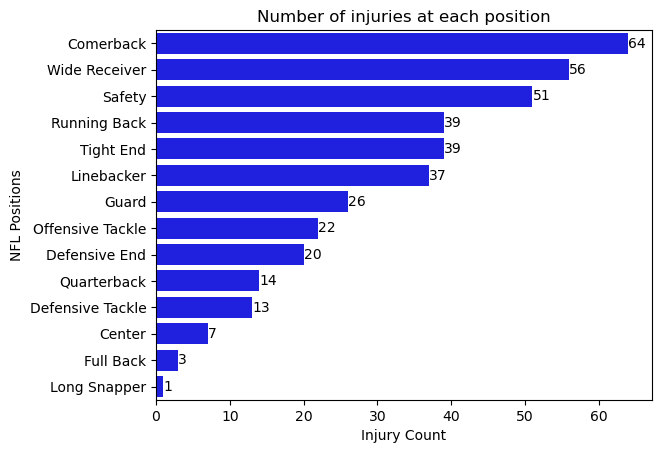

In [115]:
# Using .value_counts() to indicate each unique value of 'Position' in the dataframe
ax1 = ad['Position'].value_counts()

# Using seaborn and .barplot to create a horozontal bar plot
graph = sns.barplot(y = ax1.index, x = ax1.values, color = 'blue')

# Using . bar_label to add numerical labels to the bar plot, and .containers[0] to access the first container of the bar plot which is the bars themselves
plt.bar_label(graph.containers[0])

# Adding a title using .title and X and Y titles using .xlabel and .ylabel
plt.title('Number of injuries at each position')
plt.ylabel('NFL Positions')
plt.xlabel('Injury Count')

# Using .show() to display the bar plot
plt.show()

8. Based off these results, we can see that the cornerback position is the most prone to injuries with an astounding 64 injuries recorded during 2012-2014. Also based off these results, you can see the more physical contact there is at each position, the more likely they are to get an injury. Example, with cornerback being the most prone to injuries, as we go down the graph, the less physical contact there is at each position leading to a lesser amount of injuries, with long snapper having the least amount of injuries at 1 injury, as they also have the least amount of physical contact at this position.

9. Next, I wanted to see the injury types and weeks injured that were recorded since we now know the amount of injuries at each position. This will help get a better understanding of what types of injuries these players endured during the 2012-2014 seasons and how long it kept them out of playing time. For this I am going to create a scatter plot displaying the Reported Injury Type by Weeks Injured.

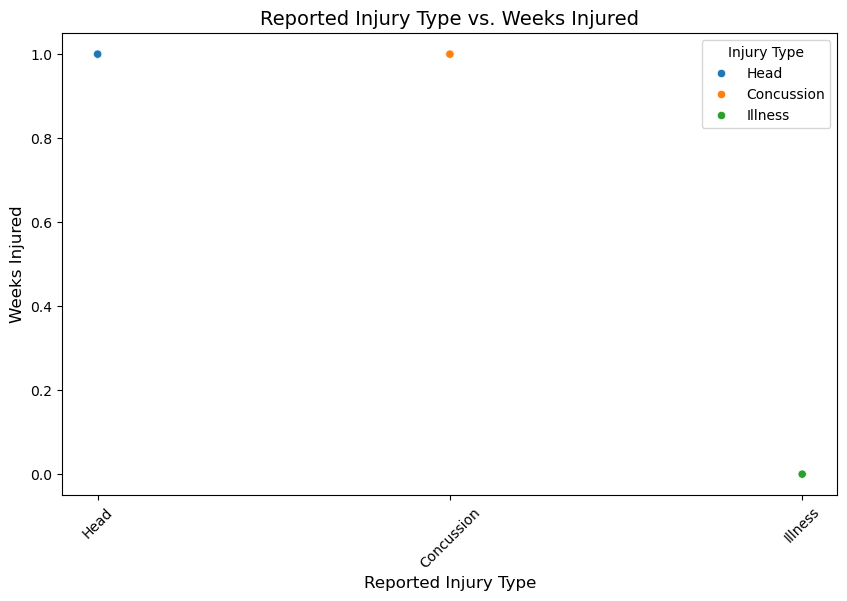

In [116]:
# Filtering the data so that any data in the dataframe 'Weeks Injured' is not displayed with the exception of Illness.
filtered_data = ad[(ad['Weeks Injured'] > 0) | (ad['Reported Injury Type'] == 'Illness')]

# Using .figure to create the figure size 
plt.figure(figsize=(10, 6))

# Creating a scatter plot with the dataframes 'Reported Injury Type' and 'Weeks Injured' using seaborn and .scatterplot. 
sns.scatterplot(data=filtered_data, x='Reported Injury Type', y='Weeks Injured', hue='Reported Injury Type')

# Adding a title using .title and X and Y titles using .xlabel and .ylabel
plt.title('Reported Injury Type vs. Weeks Injured', fontsize=14)
plt.xlabel('Reported Injury Type', fontsize=12)
plt.ylabel('Weeks Injured', fontsize=12)

# Adding ticks to the scatter plot using .xticks
plt.xticks(rotation=45)

# Adding a key to the scatter plot using .legend
plt.legend(title='Injury Type', fontsize=10)

# Using .show() to display the scatterplot
plt.show()


10. Based off these results, we can see that concussions and head injuries took the longest to recover from as they take a week or more to recover. Illness was recorded but of course typically that does not take a week to recover from, at least in this case. Head and concussions kind of go hand in hand, they both involve contact to the head of course, but they are different because while a head injury is an injury to the head, a concussion is an injury to the brain. We can see that the number of concussions outweighs the amount of other injury types by a lot. This is sad to see as concussions are one of the worst types of injuries if not the worst as it can lead to a lifelong brain affection.

11. After finding out the types of injuries that were recorded and the weeks injured, I wanted to see if there were any injuries that were recorded that were unknown. Knowing if there are any unknown injury types in this data set is crucial because in a way it tests to see how reliable the data set is. If there are a lot of unkown injuries recorded in a data set that is focues toward a specific injury, in this case, concussion, it could raise questions about how reliable the data set is. To find this out I am creating a simple barplot to display the Unknown Injuries and count how many times they were recorded.

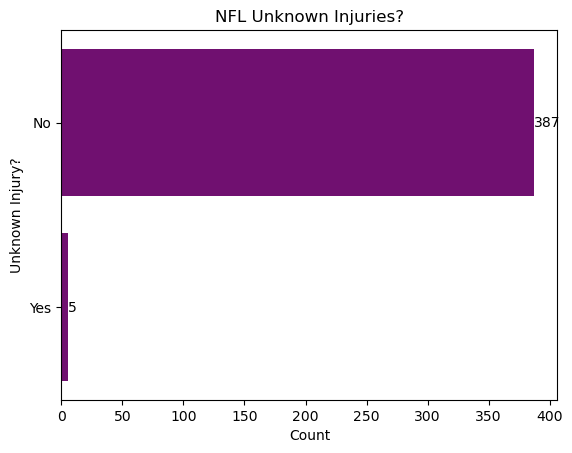

In [117]:
# Using .value_counts() to indicate each unique value of 'Unknown Injury?' in the dataframe
ax3 = ad['Unknown Injury?'].value_counts()

# Using seaborn and .barplot to create the bar plot
graph = sns.barplot(y = ax3.index, x = ax3.values, color = 'purple')

# Using . bar_label to add numerical labels to the bar plot, and .containers[0] to access the first container of the bar plot which is the bars themselves
plt.bar_label(graph.containers[0])

# Adding a title using .title and X and Y titles using .xlabel and .ylabel
plt.title('NFL Unknown Injuries?')
plt.ylabel('Unknown Injury?')
plt.xlabel('Count')

# Using .show() to display the barplot
plt.show()

12. Analyzing these results, this is a good sign to see. There were 387 injuries that were known and only 5 injuries that were unknown. This tells us that the data that was recorded specifically for concussions in the NFL were almost all concussion related. In other words, there were not an abundant amount of injuries such as broken bones or ACL/MCL tears and such in a data set that is meant for concussions.

13. Now that I have gathered all the information I needed about the injuries, I want to see the comparison percentage of injuries in the Pre-Season vs the Regular Season. I want to see this data because an NFL Pre-Season is only three games whereas the regular season is 17 games, and I want to see how the Pre-Season injuries fare up against the Regular Season. To show this, I am creating a pie chart that displays the percentages of injuries in the Pre-Season vs the Regular Season.

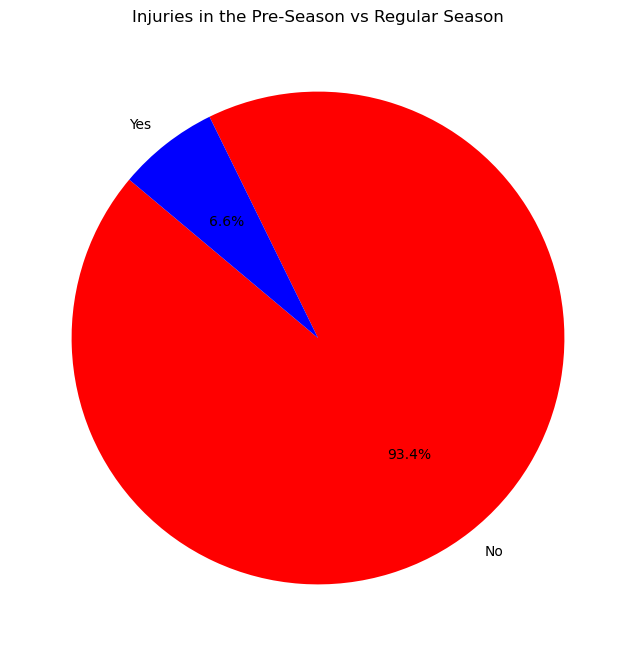

In [118]:
# Accessing the 'Pre-Season Injury?' dataframe and using .valuecounts() to count the amount of times each unique value appears
injury_counts = ad['Pre-Season Injury?'].value_counts()

# Using .figure to create the figure size
plt.figure(figsize=(8, 8))

# Using .pie to create the pie chart
plt.pie(injury_counts, labels=injury_counts.index, colors=['red', 'blue'], autopct='%1.1f%%', startangle=140)

# Giving the pie chart a title using .title
plt.title('Injuries in the Pre-Season vs Regular Season')

# Using .show() to diplay the pie chart
plt.show()

14. Looking at the Pie chart, this is what I have expected. Considering it's the Pre-Season and its a significant amount of less games and they take it a bit lighter than the regular season, I definitely didn't expect to see any high percentages here.

15. After seeing the percentages of the injuries in the Pre-Season vs the Regular Season, I want to see exactly the number of injuries that occured in the Pre-Season vs the Regular Season. To display this data I am going to create another simple barplot that displays the number of injuries that occured in the Pre-Season, which would then tell us the amount that occured in the Regular Season.

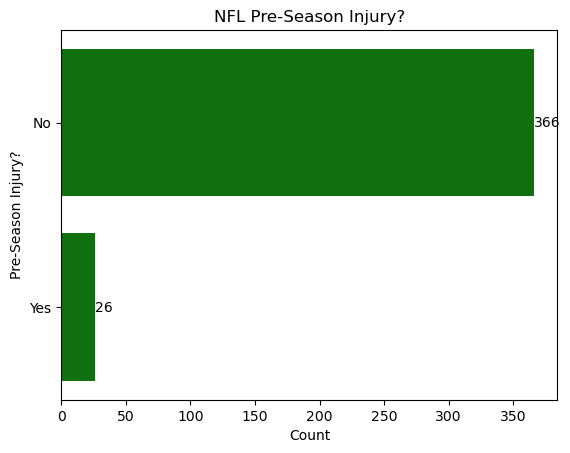

In [119]:
# Accessing the 'Pre-Season Injury?' dataframe and using .valuecounts() to count the amount of times each unique value appears
ax4 = ad['Pre-Season Injury?'].value_counts()

# Using seaborn and .barplot to create the bar plot
graph = sns.barplot(y = ax4.index, x = ax4.values, color = 'green')

# Using . bar_label to add numerical labels to the bar plot, and .containers[0] to access the first container of the bar plot which is the bars themselves
plt.bar_label(graph.containers[0])

# Adding a title using .title and X and Y titles using .xlabel and .ylabel
plt.title('NFL Pre-Season Injury?')
plt.ylabel('Pre-Season Injury?')
plt.xlabel('Count')

# Using .show() to display the bar plot
plt.show()

16. Now we can see exactly how many injuries there were in the Pre-Season compared to the Regular Season. We can see that there were 26 injuries in the Pre- Season, and 366 injuries in the Regular Season. How would it fare if the Pre-Season were a full Regular Season length? If you take 17, because there are 17 Regular Season games, and divide that by 3 since there are only 3 Pre-Season games, and multiply 26 by the result of 17 divided by 3 since there were 26 injuries recorded during the Pre-Season, you get 147.3, which is the number of injuries there would be if the rate of Pre-Season injuries were a full Season. The Regular Season itself, not the Regular Season if it were the Pre-Season injury rate, would still have more injuries. This does not surprise me since the Pre-Season games are not taken that serious since they are trying to still play hard but keep their players healthy for the Regular Season.

17. Now that I have seen everything I need to know about injuries, I wanted to break it down into seasons. I want to break donw the NFL Season by Weeks Injured each Season. I want to see this data to get an idea of if the injuries that were recorded for the 2012-2014 seasons were getting better or worse. To display this, I am going to use a bar plot. This bar plot is credit by user Baekhakjeon (https://www.kaggle.com/baekhakjeon/explorer-tabular-playground-series-apr-2021).

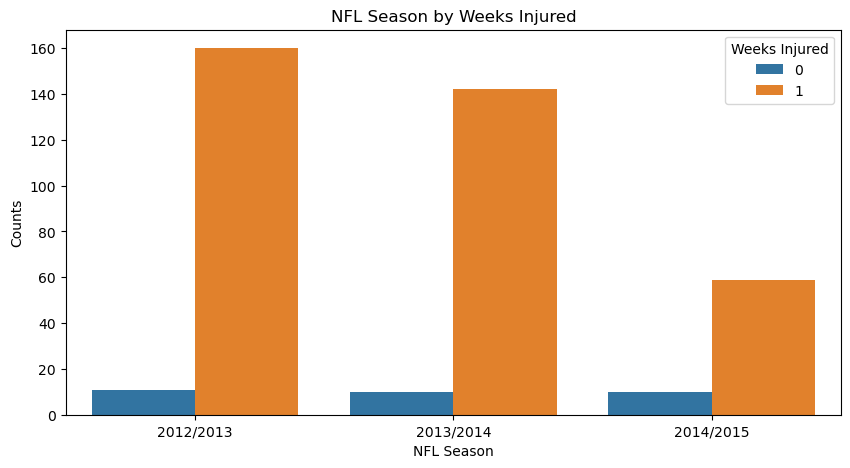

In [120]:
# Code by Baekhakjeon https://www.kaggle.com/baekhakjeon/explorer-tabular-playground-series-apr-2021

# Using .figure to create the figure size
plt.figure(figsize = (10, 5))

# Using seaborn and .countplot to count the unique vale of 'Season' in the dataframe
ax6 = sns.countplot(x='Season', hue='Weeks Injured', data=ad)

for p in ax6.patches:
    ax6.annotate(text=p.get_height(), xy=(p.get_x()+0.2, p.get_height()+200), horizontalalignment='center', verticalalignment='top')

# Adding a title using .title
plt.title('NFL Season by Weeks Injured')    

# Adding labels to the X and Y axis's using .xlabel and .ylabel
plt.xlabel('NFL Season')
plt.ylabel('Counts')

# Displaying the graph using .show()
plt.show()

18. According to this data, the amount of weeks injured actually DECREASED as the seasons went on. I found this information a little shocking. I honestly thought that the amount of weeks injured by season would increase since football is very physical. The only reason I could think of as to why it decreases is because there might have been a new helmet that was created that had more padding and safer for players. Other than that im not sure as to why this could be and this shocked me.

19. Finally, to ultimately see if injuries in the NFL, mainly concussions and head injuries, were getting better or worse. Over the course of 2012-2014, I thought that injuries in the NFL would have been getting worse, but so far after making plots of data and seeing the results, I feel obligated to say that I am expecting to see and improvement in concussions and head injuries, as in less and less of them. To prove this, I am going to create a line chart that displays the months and years all throughout the 2012-2014 Seasons and the amount of injuries that occured throughout them. Part of this line chart was creating with the assistance AI (ChatGPT).

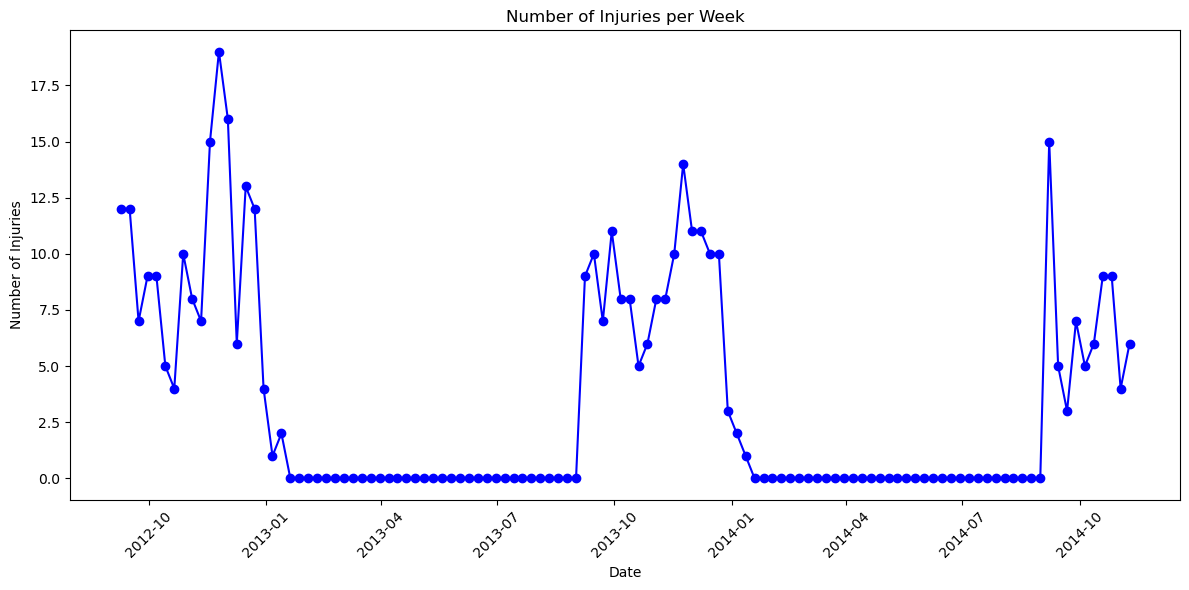

In [121]:
# Part of this line chart was created with the assistance of AI (ChatGPT)

# Converting the 'Date' column to datetime
ad["Date"] = pd.to_datetime(ad["Date"], dayfirst=True)

# Grouping by date and count the number of injuries, resampling weekly using .resample
by_date = ad.resample('W', on='Date').size()

# Using .figure to create the figure size
plt.figure(figsize=(12, 6))

# Using .plot to display the line plot
plt.plot(by_date.index, by_date.values, marker='o', linestyle='-', color='blue')

# Using .xticks to add ticks to the line plot
plt.xticks(rotation=45)

# Giving X and Y axis's titles using .xlabel and .ylabel
plt.xlabel("Date")
plt.ylabel("Number of Injuries")

# Giving the line plot a title using .title
plt.title("Number of Injuries per Week")

# Using .tight_layout() to space out the line graph and prevent overlapping
plt.tight_layout()

# Using .show() to display the line plot
plt.show()

20. As it turns out, I made the correct choice of siding with the data and believing that the injuries would be less and less common as the seasons go on. Looking at the line chart we can see that for each season, there is typically data recorded from the months of September to February, this is because this is when the NFL Season is. For the months there are nothing recorded, that is because the NFL Season isnt occuring. As We look at the first season, 2012-2013, we can see there is a high rate of injuries, maybe there were helmets that needed upgrades or it was just that bad that year, but overall it was a very high rate of injuries. Onto the next season, 2013-2014, we can see that the injuries improved. Maybe helmets became better with more padding or tehcnology or it was just a better season of less injuries overall, but it was just less injuries than the 2012-2013 season. And finally, the 2014 season, we can see it started off high, but immediately after that we see better numbers than any other season. This leads me to believe that something was made to improve player safety and not just a fluke.

21. In conclusion, by taking many different looks at certain data through bar graphs, I am shocked to see that the trend of injuries per season, most importantly concussions per season is on a downward trend. I would have thought that the trend would be going up as it seems football gets more and more physical but I was wrong. It is a good thing I am wrong however as we do not wish to see concussions at all, at least keep them to low numbers. This reason could be due to new helmets with their new protection design and padding. Helmet companies are always looking to design helmets to protect players from getting head injuries and most importantly concussions. Today, we even see Guardian Caps which is extra padding that attaches to the players helmets and keeps them more protected. After doing some quick research, company "Riddell" created the speedflex helmet in 2014 that was meant to improve player safety with its new technology. This could be one of the reasons why we see that downwards trend of injuries per season. I am curious to see the data in the future for players that wear guardian caps compared to players that don't and see how they fare against each other. Some limitations I had during this analysis is that this data is from over a near decade ago, so I am not exactly sure how the data would look now, but like I said considering companies are always improving helmet designs and technology to keep players safe, I still expect to see a downwards trend, especially after guardians caps came out and is the best helmet protection out currently.